# BirdWatch Data Cleaning and Basic EDA


## Author: Rosemarie Martienssen


***

This notebook is the first in a series of (so far) three. We use data obtained from [Project Feederwatch](https://feederwatch.org/explore/raw-dataset-requests/) which we want to leverage to predict the occurence of bird species at certain months and locations. 

**On the Data Source**

FeederWatch, operated by the Cornell Lab of Ornithology and Birds Canada, is a November-April survey of birds that visit backyards, nature centers, community areas, and other locales in North America. Any interested bird-enthusiast can sign up and submit data to the survey. The Data is used by many researchers to analyze bird species and factors that influence their occurence at certain sites.

### Table of contents<a class = "anchor" id = "ToC"></a>
- [Part 0: Import required Python packages and import raw data](#Part-0)

- [Part 1: Data cleaning](#Part-1)
    - [Clean the main dataset from 2021 - 2023](#Part-1.1)
    - [Clean the main dataset from 2016 - 2020](#Part-1.2)
    - [Clean the main dataset from 2011 - 2015](#Part-1.3)
    - [Clean the species dataset](#Part-1.4)
    - [Clean the location dataset](#Part-1.5)    
    - [Concatenate the main datasets and merge with the species dataset](#Part-1.6)
    
- [Part 2: Basic EDA](#Part-2)

### Part 0: Import required Python packages and import raw data <a class = "anchor" id = "Part-0"></a>

In [2]:
#import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

#from scipy import stats
#from scipy.stats import norm #used for plotting
#import statsmodels.api as sm

We will import a total of 5 tables in this notebook. 
- `df_raw_2021_2023` contains the main survey information from the years 2021-2023
- `df_raw_2016_2020` contains the main survey information from the years 2016-2020
- `df_raw_2011_2015` contains the main survey information from the years 2011-2015
- `df_species` contains the names of the different species, which can be mapped to the main survey tables
- `df_location` contains additional survey information about the observation location


We will clean these tables seperately, and then combine them into a [single table](#data_table), containing the survey information from 2011-2023



In [3]:
#Import 3 tables of bird feeder data into PANDAS Dataframe


dtypes = {'alt_full_spp_code': 'str'} #Specify the datatypes for some of the columns used in order to prevent getting any warnings

df_raw_2021_2023 = pd.read_csv("../data/raw/PFW_all_2021_2023_June2023_Public.csv" , dtype = dtypes) 
df_raw_2016_2020 = pd.read_csv("../data/raw/PFW_all_2016_2020_June2023_Public.csv", dtype = dtypes)
df_raw_2011_2015 = pd.read_csv("../data/raw/PFW_all_2011_2015_June2023_Public.csv", dtype = dtypes) 

In [4]:
#Import the table containing species data into a PANDAS Dataframe

df_species = pd.read_csv("../data/raw/PFW_spp_translation_table_May2023.csv") 

**Note** *that in this version of this notebook, the code relating to the location table is commented and not executed. The table requires a lot of cleaning and since I am not yet sure how the columns will be used, the focus is on the other tables*

In [5]:
#Import the table containing location data into a PANDAS Dataframe

#df_location = pd.read_csv("../data/raw/PFW_count_site_data_public_June2023.csv") 

***
***
[Back to Table of Contents](#ToC) 

***
***

### Part 1: Data cleaning <a class = "anchor" id = "Part-1"></a>

#### Main Birdfeeder Datasets `(df_raw_years)` 

In [6]:
#Checking the dimensions of the data tables

print(f" Dimensions of the dataset from 2021 - 2023: {df_raw_2021_2023.shape}")
print(f" Dimensions of the dataset from 2016 - 2020: {df_raw_2016_2020.shape}")
print(f" Dimensions of the dataset from 2011 - 2015: {df_raw_2011_2015.shape}")

 Dimensions of the dataset from 2021 - 2023: (8394814, 24)
 Dimensions of the dataset from 2016 - 2020: (9209114, 24)
 Dimensions of the dataset from 2011 - 2015: (7460559, 24)


We have 24 columns in all three tables, but different numbers of rows

In [7]:
#First look at the data

df_raw_2021_2023.head()

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,ENTRY_TECHNIQUE,SUB_ID,OBS_ID,Month,Day,Year,...,PLUS_CODE,VALID,REVIEWED,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,EFFORT_HRS_ATLEAST,SNOW_DEP_ATLEAST,Data_Entry_Method
0,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317836,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5
1,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317837,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5
2,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317838,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5
3,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317839,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5
4,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317840,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5


In [8]:
#Check the data types of the columns in the dataset from 2021-2023

df_raw_2021_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394814 entries, 0 to 8394813
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   LOC_ID              object 
 1   LATITUDE            float64
 2   LONGITUDE           float64
 3   SUBNATIONAL1_CODE   object 
 4   ENTRY_TECHNIQUE     object 
 5   SUB_ID              object 
 6   OBS_ID              object 
 7   Month               int64  
 8   Day                 int64  
 9   Year                int64  
 10  PROJ_PERIOD_ID      object 
 11  SPECIES_CODE        object 
 12  alt_full_spp_code   object 
 13  HOW_MANY            float64
 14  PLUS_CODE           float64
 15  VALID               float64
 16  REVIEWED            float64
 17  DAY1_AM             int64  
 18  DAY1_PM             int64  
 19  DAY2_AM             int64  
 20  DAY2_PM             int64  
 21  EFFORT_HRS_ATLEAST  float64
 22  SNOW_DEP_ATLEAST    float64
 23  Data_Entry_Method   object 
dtypes: float64(8), int64(7),

Before we continue, I want to make sure that the three tables all follow the same structure, meaning that they have the same columns and the same datatypes in each column.

In [9]:
# Check if columns are the same

if df_raw_2021_2023.columns.tolist() == df_raw_2016_2020.columns.tolist() == df_raw_2011_2015.columns.tolist():
    print("All dataframes have the same columns.")
else:
    print("Dataframes have different columns.")

# Check if column datatypes are the same

if df_raw_2021_2023.dtypes.equals(df_raw_2016_2020.dtypes) and df_raw_2021_2023.dtypes.equals(df_raw_2011_2015.dtypes):
    print("All dataframes have the same column datatypes.")
else:
    print("Dataframes have different column datatypes.")

All dataframes have the same columns.
Dataframes have different column datatypes.


This is not the result we were hoping for when comparing datatypes. This means we need to clean the tables seperately, then make sure datatypes align, before we can concatenate them into one big table.

#### Clean the `df_raw_2021_2023` table: <a class = "anchor" id = "Part-1.1"></a>

In [10]:
#Check for the number of na values in each column

df_raw_2021_2023.isna().sum()

LOC_ID                      0
LATITUDE                    0
LONGITUDE                   0
SUBNATIONAL1_CODE           0
ENTRY_TECHNIQUE        255951
SUB_ID                      0
OBS_ID                   7893
Month                       0
Day                         0
Year                        0
PROJ_PERIOD_ID              0
SPECIES_CODE                0
alt_full_spp_code     8346300
HOW_MANY                 7893
PLUS_CODE             8394814
VALID                    7893
REVIEWED                 7893
DAY1_AM                     0
DAY1_PM                     0
DAY2_AM                     0
DAY2_PM                     0
EFFORT_HRS_ATLEAST      14557
SNOW_DEP_ATLEAST       782968
Data_Entry_Method           0
dtype: int64

A lot of columns have null values. We will look at each one of them, starting with `ENTRY_TECHNIQUE`

In [11]:
#Check the values in the ENTRY_TECHNIQUE column and how many times they occur

df_raw_2021_2023["ENTRY_TECHNIQUE"].value_counts() 

ENTRY_TECHNIQUE
/GOOGLE_MAP/ZOOM:15                          3743240
/GOOGLE_MAP/ZOOM:18                          1261994
POSTCODE LAT/LONG LOOKUP                      634934
ESRI_WEBSERVICE_STREET                        565609
PointMaker1.0_2                               298989
                                              ...   
otherMicrosoft Streets and Trips                  91
LocCreateAPI                                      91
otherPFW Mapping Tool                             63
ESRI_WEBSERVICE_STREET/GOOGLE_MAP/ZOOM:-4          9
othertowns.USA.org                                 1
Name: count, Length: 116, dtype: int64

The information contained in this column is not fundamental to the goal of this project. Let's remove the column entirely. We can save the data in a new dataframe to leave the raw data untouched

In [12]:
#Drop the values in the ENTRY_TECHNIQUE column 

df_birdfeeder_2021_2023 = df_raw_2021_2023.drop('ENTRY_TECHNIQUE', axis=1, inplace=False)
df_birdfeeder_2021_2023.shape 

(8394814, 23)

***

In [13]:
#Look at the null values again

df_birdfeeder_2021_2023.isna().sum() 

LOC_ID                      0
LATITUDE                    0
LONGITUDE                   0
SUBNATIONAL1_CODE           0
SUB_ID                      0
OBS_ID                   7893
Month                       0
Day                         0
Year                        0
PROJ_PERIOD_ID              0
SPECIES_CODE                0
alt_full_spp_code     8346300
HOW_MANY                 7893
PLUS_CODE             8394814
VALID                    7893
REVIEWED                 7893
DAY1_AM                     0
DAY1_PM                     0
DAY2_AM                     0
DAY2_PM                     0
EFFORT_HRS_ATLEAST      14557
SNOW_DEP_ATLEAST       782968
Data_Entry_Method           0
dtype: int64

The `OBS_ID` column is the "Unique identifier for each observation of a species", according to the data dictionary. Interestingly the number of NA values here coincides with the number of na values in some other columns

In [14]:
#Get a filtered dataframe containing all the rows that have null values in the OBS_ID column

temp_df = df_birdfeeder_2021_2023[df_birdfeeder_2021_2023['OBS_ID'].isna()]

In [15]:
temp_df.shape #Sanity Check

(7893, 23)

In [16]:
#Check the na values in the newly created dataframe

temp_df.isna().sum()

LOC_ID                   0
LATITUDE                 0
LONGITUDE                0
SUBNATIONAL1_CODE        0
SUB_ID                   0
OBS_ID                7893
Month                    0
Day                      0
Year                     0
PROJ_PERIOD_ID           0
SPECIES_CODE             0
alt_full_spp_code     7893
HOW_MANY              7893
PLUS_CODE             7893
VALID                 7893
REVIEWED              7893
DAY1_AM                  0
DAY1_PM                  0
DAY2_AM                  0
DAY2_PM                  0
EFFORT_HRS_ATLEAST     388
SNOW_DEP_ATLEAST      1510
Data_Entry_Method        0
dtype: int64

As suspected, there is data missing across different columns in the selected rows. Given the size of the dataframe, we can simply remove these.

In [17]:
#Replace the dataframe by the version without null values in the OBS_ID column

df_birdfeeder_2021_2023 = df_birdfeeder_2021_2023.dropna(subset=['OBS_ID'])

In [18]:
df_birdfeeder_2021_2023.shape #Sanity Check

(8386921, 23)

***

In [19]:
#Check the null values again

df_birdfeeder_2021_2023.isna().sum() 

LOC_ID                      0
LATITUDE                    0
LONGITUDE                   0
SUBNATIONAL1_CODE           0
SUB_ID                      0
OBS_ID                      0
Month                       0
Day                         0
Year                        0
PROJ_PERIOD_ID              0
SPECIES_CODE                0
alt_full_spp_code     8338407
HOW_MANY                    0
PLUS_CODE             8386921
VALID                       0
REVIEWED                    0
DAY1_AM                     0
DAY1_PM                     0
DAY2_AM                     0
DAY2_PM                     0
EFFORT_HRS_ATLEAST      14169
SNOW_DEP_ATLEAST       781458
Data_Entry_Method           0
dtype: int64

Focusing on the `alt_full_spp_code` column, this is the description from the data dictionary: 

This column enables someone to "roll up" information on subspecies and recognizable forms into the species code of the full species instead of the code for the recognizable form. The species code values for the subspecies/forms are still the primary information stored in the column `SPECIES_CODE`, but the alternate code for the full species is available in the column immediately to its right.

In [20]:
#Check the values of the column "alt_full_spp_code" and how many times they occur

df_birdfeeder_2021_2023["alt_full_spp_code"].value_counts() 

alt_full_spp_code
rocpig     23521
daejun     16679
norfli      2757
yerwar      1400
mallar3     1137
musduc       597
foxspa       497
reshaw       402
grbher3      382
rethaw       184
norcar       179
greegr       142
rewbla        99
amekes        68
monpar        61
houwre        61
y00678        55
merlin        45
eastow        42
hergul        40
palwar        37
sancra        31
orcwar        23
turvul        11
osprey         9
y00475         9
sonspa         8
savspa         8
herthr         7
cangoo         5
easmea         4
amerob         3
commer         3
comcan         2
nrwswa         1
compea         1
purmar         1
nopowl         1
whcspa         1
wlswar         1
Name: count, dtype: int64

Leaving the  `alt_full_spp_code` column as it is for the moment, as I am not sure yet how (or if) I will use it. At the moment, about 99% of values in the columns are missing, but it seems like it was meant to be populated during analysis (?)




Moving on to the `plus-code` column, the data dictionary says the following: 

"Data field used on historic paper data forms (no longer being populated) ...." 
It seems safe to simply remove the column.

In [21]:
#Drop the "plus_code" column from the df

df_birdfeeder_2021_2023 = df_birdfeeder_2021_2023.drop('PLUS_CODE', axis=1, inplace=False) 

In [22]:
df_birdfeeder_2021_2023.shape #Sanity Check

(8386921, 22)

***

In [23]:
#Check the null values again

df_birdfeeder_2021_2023.isna().sum()

LOC_ID                      0
LATITUDE                    0
LONGITUDE                   0
SUBNATIONAL1_CODE           0
SUB_ID                      0
OBS_ID                      0
Month                       0
Day                         0
Year                        0
PROJ_PERIOD_ID              0
SPECIES_CODE                0
alt_full_spp_code     8338407
HOW_MANY                    0
VALID                       0
REVIEWED                    0
DAY1_AM                     0
DAY1_PM                     0
DAY2_AM                     0
DAY2_PM                     0
EFFORT_HRS_ATLEAST      14169
SNOW_DEP_ATLEAST       781458
Data_Entry_Method           0
dtype: int64

The `EFFORT_HRS_ATLEAST` column will not be of interest in this project and can also be removed

In [24]:
#Drop the 'EFFORT_HRS_ATLEAST' column from the dataset and check the size of the dataset

df_birdfeeder_2021_2023 = df_birdfeeder_2021_2023.drop('EFFORT_HRS_ATLEAST', axis=1, inplace=False) 
df_birdfeeder_2021_2023.shape

(8386921, 21)

Now the last column left to examine is about the snow depth: `SNOW_DEP_ATLEAST`

In [25]:
#Check the values of the "SNOW_DEP_ATLEAST" column to decide what to do with it

df_birdfeeder_2021_2023["SNOW_DEP_ATLEAST"].value_counts()

SNOW_DEP_ATLEAST
0.000     4992865
0.001     1038294
5.000      879946
15.001     694358
Name: count, dtype: int64

In [26]:
#Checking the percentage of missing values in the "SNOW_DEP_ATLEAST" column

781458/df_birdfeeder_2021_2023.shape[0] * 100 

9.317579121110118

I am not sure at the moment how and if I will be using this column, so leaving it for now.
***

In [27]:
#Check the null values in the dataframe again

df_birdfeeder_2021_2023.isna().sum()

LOC_ID                     0
LATITUDE                   0
LONGITUDE                  0
SUBNATIONAL1_CODE          0
SUB_ID                     0
OBS_ID                     0
Month                      0
Day                        0
Year                       0
PROJ_PERIOD_ID             0
SPECIES_CODE               0
alt_full_spp_code    8338407
HOW_MANY                   0
VALID                      0
REVIEWED                   0
DAY1_AM                    0
DAY1_PM                    0
DAY2_AM                    0
DAY2_PM                    0
SNOW_DEP_ATLEAST      781458
Data_Entry_Method          0
dtype: int64

***
***

Done with the null values (for now!) Moving on to check for any duplicate rows:

In [28]:
#Display duplicate rows in the dataframe

df_birdfeeder_2021_2023[df_birdfeeder_2021_2023.duplicated()]

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,SUB_ID,OBS_ID,Month,Day,Year,PROJ_PERIOD_ID,...,alt_full_spp_code,HOW_MANY,VALID,REVIEWED,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,SNOW_DEP_ATLEAST,Data_Entry_Method


Seems like we have no duplicate rows!

***
***

Next, we investigate the two columns `VALID` and `REVIEWED`. According to the Data Source Website, these columns are used to flag records that are unexpected / may need validation or additional evidence. 

In [29]:
df_birdfeeder_2021_2023['VALID'].value_counts()

VALID
1.0    8336959
0.0      49962
Name: count, dtype: int64

In [30]:
df_birdfeeder_2021_2023['REVIEWED'].value_counts()

REVIEWED
0.0    8351139
1.0      35782
Name: count, dtype: int64

We need to see the combination of these two values to really make sense of them

In [31]:
#Use the groupby function to see the valid and reviewd columns

df_birdfeeder_2021_2023.groupby(['VALID'])['REVIEWED'].value_counts()

VALID  REVIEWED
0.0    0.0           49878
       1.0              84
1.0    0.0         8301261
       1.0           35698
Name: count, dtype: int64

- `VALID` = 1 and `REVIEWED` = 0 : Data did not trigger the automatic flagging system and was accepted into the database without review
- `VALID` = 1 and `REVIEWED` = 1 : Data triggered the flagging system and was approved by an expert reviewer
- `VALID` = 0 and `REVIEWED` = 0 : Data triggered a flag by the automated system and awaits the review process 
- `VALID` = 0 and `REVIEWED` = 1 : Data triggered a flag by the automated system and was reviewed; insufficient evidence was provided to confirm the report

We only want to keep the valid data. While there is some data that is awaiting review, given the numbers it seems unlikely that these will have a big effect, so it seems safe to remove all the rows that have `VALID` = 0.

In [32]:
#Remove invalid rows from the dataframe by keeping only the valid ones

df_birdfeeder_2021_2023 = df_birdfeeder_2021_2023[df_birdfeeder_2021_2023['VALID'] == 1]

In [33]:
#Sanity Check

df_birdfeeder_2021_2023.groupby(['VALID'])['REVIEWED'].value_counts()

VALID  REVIEWED
1.0    0.0         8301261
       1.0           35698
Name: count, dtype: int64

Now there is no more need for the two columns, so they can be removed.

In [34]:
#Drop the valid and reviewed columns

df_birdfeeder_2021_2023 = df_birdfeeder_2021_2023.drop(['VALID', 'REVIEWED'], axis=1, inplace=False) 

In [35]:
df_birdfeeder_2021_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8336959 entries, 0 to 8394813
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   LOC_ID             object 
 1   LATITUDE           float64
 2   LONGITUDE          float64
 3   SUBNATIONAL1_CODE  object 
 4   SUB_ID             object 
 5   OBS_ID             object 
 6   Month              int64  
 7   Day                int64  
 8   Year               int64  
 9   PROJ_PERIOD_ID     object 
 10  SPECIES_CODE       object 
 11  alt_full_spp_code  object 
 12  HOW_MANY           float64
 13  DAY1_AM            int64  
 14  DAY1_PM            int64  
 15  DAY2_AM            int64  
 16  DAY2_PM            int64  
 17  SNOW_DEP_ATLEAST   float64
 18  Data_Entry_Method  object 
dtypes: float64(4), int64(7), object(8)
memory usage: 1.2+ GB


***
***
***

We can now move on to the next table, which contains the data from the years 2016 - 2020.

#### Clean the `df_raw_2016_2020` table: <a class = "anchor" id = "Part-1.2"></a>

In [36]:
#Check the dimensions of the table

df_raw_2016_2020.shape

(9209114, 24)

In [37]:
#Display column types

df_raw_2016_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9209114 entries, 0 to 9209113
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   LOC_ID              object 
 1   LATITUDE            float64
 2   LONGITUDE           float64
 3   SUBNATIONAL1_CODE   object 
 4   ENTRY_TECHNIQUE     object 
 5   SUB_ID              object 
 6   OBS_ID              object 
 7   Month               int64  
 8   Day                 int64  
 9   Year                int64  
 10  PROJ_PERIOD_ID      object 
 11  SPECIES_CODE        object 
 12  alt_full_spp_code   object 
 13  HOW_MANY            float64
 14  PLUS_CODE           float64
 15  VALID               float64
 16  REVIEWED            float64
 17  DAY1_AM             float64
 18  DAY1_PM             float64
 19  DAY2_AM             float64
 20  DAY2_PM             float64
 21  EFFORT_HRS_ATLEAST  float64
 22  SNOW_DEP_ATLEAST    float64
 23  Data_Entry_Method   object 
dtypes: float64(12), int64(3)

In [38]:
#Check for the number of na values in each column

df_raw_2016_2020.isna().sum()

LOC_ID                      0
LATITUDE                    0
LONGITUDE                   0
SUBNATIONAL1_CODE           0
ENTRY_TECHNIQUE        486988
SUB_ID                      0
OBS_ID                   8909
Month                       0
Day                         0
Year                        0
PROJ_PERIOD_ID              0
SPECIES_CODE                0
alt_full_spp_code     9156823
HOW_MANY                 8909
PLUS_CODE             9209106
VALID                    8909
REVIEWED                 8909
DAY1_AM                    21
DAY1_PM                    21
DAY2_AM                    21
DAY2_PM                    21
EFFORT_HRS_ATLEAST      22095
SNOW_DEP_ATLEAST       903512
Data_Entry_Method       75890
dtype: int64

It looks like we will be able to go through (almost) the same steps as with the table before.

We start by dropping the `ENTRY_TECHNIQUE` column

In [39]:
#Drop the values in the ENTRY_TECHNIQUE column and save the data in a new dataframe

df_birdfeeder_2016_2020 = df_raw_2016_2020.drop('ENTRY_TECHNIQUE', axis=1, inplace=False)
df_birdfeeder_2016_2020.shape 

(9209114, 23)

***

The next step is to investigate the rows with missing values in the `OBS_ID` column

In [40]:
#Get a filtered dataframe containing all the rows that have null values in the OBS_ID column

temp_df = df_birdfeeder_2016_2020[df_birdfeeder_2016_2020['OBS_ID'].isna()]

In [41]:
temp_df.shape #Sanity Check

(8909, 23)

In [42]:
#Check the na values in the newly created dataframe

temp_df.isna().sum()

LOC_ID                   0
LATITUDE                 0
LONGITUDE                0
SUBNATIONAL1_CODE        0
SUB_ID                   0
OBS_ID                8909
Month                    0
Day                      0
Year                     0
PROJ_PERIOD_ID           0
SPECIES_CODE             0
alt_full_spp_code     8909
HOW_MANY              8909
PLUS_CODE             8909
VALID                 8909
REVIEWED              8909
DAY1_AM                 21
DAY1_PM                 21
DAY2_AM                 21
DAY2_PM                 21
EFFORT_HRS_ATLEAST     161
SNOW_DEP_ATLEAST      1916
Data_Entry_Method       46
dtype: int64

As before, we have NA values across the columns in these rows and will just remove them.

In [43]:
#Replace the dataframe by the version without null values in the OBS_ID column

df_birdfeeder_2016_2020 = df_birdfeeder_2016_2020.dropna(subset=['OBS_ID'])

***

Following the approach from the previous table, we now drop `EFFORT_HRS_ATLEAST` and `Plus_code` columns

In [44]:
#Drop the 'EFFORT_HRS_ATLEAST' column from the dataset and check the size of the dataset

df_birdfeeder_2016_2020 = df_birdfeeder_2016_2020.drop('EFFORT_HRS_ATLEAST', axis=1, inplace=False) 
df_birdfeeder_2016_2020.shape

(9200205, 22)

In [45]:
#Drop the "plus_code" column from the df

df_birdfeeder_2016_2020 = df_birdfeeder_2016_2020.drop('PLUS_CODE', axis=1, inplace=False) 
df_birdfeeder_2016_2020.shape

(9200205, 21)

***

In [46]:
#Check the null values again

df_birdfeeder_2016_2020.isna().sum()

LOC_ID                     0
LATITUDE                   0
LONGITUDE                  0
SUBNATIONAL1_CODE          0
SUB_ID                     0
OBS_ID                     0
Month                      0
Day                        0
Year                       0
PROJ_PERIOD_ID             0
SPECIES_CODE               0
alt_full_spp_code    9147914
HOW_MANY                   0
VALID                      0
REVIEWED                   0
DAY1_AM                    0
DAY1_PM                    0
DAY2_AM                    0
DAY2_PM                    0
SNOW_DEP_ATLEAST      901596
Data_Entry_Method      75844
dtype: int64

In this table, the `Data_Entry_Method` column has a lot of null values. We start by looking at all the value counts in this column.

In [47]:
df_birdfeeder_2016_2020['Data_Entry_Method'].value_counts()

Data_Entry_Method
PFW Web 2.x                             5060983
PFW Web 4.0.1                           1841310
PFW Web 3.0.3-SNAPSHOT                  1230478
PFW Web 3.0.0                            614569
PFW Web 4.0.2                            157921
PFW Mobile App v1.1.14                    95813
PFW Web 4.0.0                             44624
PFW Mobile App v1.1.0                     26082
PFW Mobile App vGLOBAL_APP_VER_SHORT      16152
PFW Web 4.2.7                             10276
PFW Web 4.1.4                             10273
PFW Mobile App 0.8 preview                 3363
PFW Web 4.0.4                              3037
PFW Web 4.1.5                              2823
PFW Mobile App v1.0.1                      2639
PFW Web 4.0.3                              1760
PFW Mobile App v1.1.17                     1026
PFW Mobile App v1.1.01.1.0                  647
PFW Mobile App v                            195
PFW Mobile App v1.31.00                     152
PFW Mobile App v1.0.11

It will make more sense to come back to this column once we have removed all invalid data.

In [48]:
#Use the groupby function to see the valid and reviewed columns

df_birdfeeder_2016_2020.groupby(['VALID'])['REVIEWED'].value_counts()

VALID  REVIEWED
0.0    0.0           15064
       1.0            3098
1.0    0.0         9108621
       1.0           73422
Name: count, dtype: int64

In [49]:
#Remove invalid rows from the dataframe by keeping only the valid ones

df_birdfeeder_2016_2020 = df_birdfeeder_2016_2020[df_birdfeeder_2016_2020['VALID'] == 1]
df_birdfeeder_2016_2020.groupby(['VALID'])['REVIEWED'].value_counts() #Sanity Check

VALID  REVIEWED
1.0    0.0         9108621
       1.0           73422
Name: count, dtype: int64

In [50]:
#Drop the valid and reviewed columns

df_birdfeeder_2016_2020 = df_birdfeeder_2016_2020.drop(['VALID', 'REVIEWED'], axis=1, inplace=False) 

***

Now that the data is valid, back to the `Data_Entry_Method`

In [51]:
#Create a dataframe containing the NA values in the data entry method column

df_temp = df_birdfeeder_2016_2020[df_birdfeeder_2016_2020['Data_Entry_Method'].isna()]

In [52]:
#Calculate the percentage of missing values in the Data ENtry column

df_temp.shape[0] / df_birdfeeder_2016_2020.shape[0] * 100

0.8237927006005091

Given the tiny percentage of missing values, we can just remove them.

In [53]:
#Get rid of all na values in the column

df_birdfeeder_2016_2020 = df_birdfeeder_2016_2020[df_birdfeeder_2016_2020['Data_Entry_Method'].notna()]

***

In [54]:
#Check the null values again

df_birdfeeder_2016_2020.isna().sum()

LOC_ID                     0
LATITUDE                   0
LONGITUDE                  0
SUBNATIONAL1_CODE          0
SUB_ID                     0
OBS_ID                     0
Month                      0
Day                        0
Year                       0
PROJ_PERIOD_ID             0
SPECIES_CODE               0
alt_full_spp_code    9055291
HOW_MANY                   0
DAY1_AM                    0
DAY1_PM                    0
DAY2_AM                    0
DAY2_PM                    0
SNOW_DEP_ATLEAST      896983
Data_Entry_Method          0
dtype: int64

***
***

In [55]:
#Display duplicate rows in the dataframe

df_birdfeeder_2016_2020[df_birdfeeder_2016_2020.duplicated()]

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,SUB_ID,OBS_ID,Month,Day,Year,PROJ_PERIOD_ID,SPECIES_CODE,alt_full_spp_code,HOW_MANY,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,SNOW_DEP_ATLEAST,Data_Entry_Method


No duplicate rows in this table!

***
***
***

We can now move on to the next table, which also contains the data from the years 2011 - 2015.

#### Clean the `df_raw_2011_2015` table: <a class = "anchor" id = "Part-1.3"></a>

In [56]:
#Check the dimensions of the table

df_raw_2011_2015.shape

(7460559, 24)

In [57]:
#Display column types

df_raw_2011_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7460559 entries, 0 to 7460558
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   LOC_ID              object 
 1   LATITUDE            float64
 2   LONGITUDE           float64
 3   SUBNATIONAL1_CODE   object 
 4   ENTRY_TECHNIQUE     object 
 5   SUB_ID              object 
 6   OBS_ID              object 
 7   Month               int64  
 8   Day                 int64  
 9   Year                int64  
 10  PROJ_PERIOD_ID      object 
 11  SPECIES_CODE        object 
 12  alt_full_spp_code   object 
 13  HOW_MANY            float64
 14  PLUS_CODE           float64
 15  VALID               float64
 16  REVIEWED            float64
 17  DAY1_AM             float64
 18  DAY1_PM             float64
 19  DAY2_AM             float64
 20  DAY2_PM             float64
 21  EFFORT_HRS_ATLEAST  float64
 22  SNOW_DEP_ATLEAST    float64
 23  Data_Entry_Method   object 
dtypes: float64(12), int64(3)

Following the approaches for the two previous tables, we can drop the columns `ENTRY_TECHNIQUE`, `PLUS_CODE` and `EFFORT_HRS_ATLEAST`

In [58]:
#Drop the columns which were removed in the previous tables and save the data in a new dataframe

df_birdfeeder_2011_2015 = df_raw_2011_2015.drop(['ENTRY_TECHNIQUE', 'PLUS_CODE', 'EFFORT_HRS_ATLEAST'], axis=1, inplace=False)
df_birdfeeder_2011_2015.shape 

(7460559, 21)

***

Now we have to see what null values remain in this dataframe

In [59]:
#Check for na values

df_birdfeeder_2011_2015.isna().sum()

LOC_ID                     0
LATITUDE                   0
LONGITUDE                  0
SUBNATIONAL1_CODE          0
SUB_ID                     0
OBS_ID                  8480
Month                      0
Day                        0
Year                       0
PROJ_PERIOD_ID             0
SPECIES_CODE               0
alt_full_spp_code    7415457
HOW_MANY                8480
VALID                   8480
REVIEWED                8480
DAY1_AM               324666
DAY1_PM               885349
DAY2_AM               482644
DAY2_PM               955617
SNOW_DEP_ATLEAST     1155337
Data_Entry_Method     105676
dtype: int64

Removing the null values from the `OBS_ID` column should also clear up other columns

In [60]:
#Replace the dataframe by the version without null values in the OBS_ID column

df_birdfeeder_2011_2015 = df_birdfeeder_2011_2015.dropna(subset=['OBS_ID'])

In [61]:
#Check for na values

df_birdfeeder_2011_2015.isna().sum()

LOC_ID                     0
LATITUDE                   0
LONGITUDE                  0
SUBNATIONAL1_CODE          0
SUB_ID                     0
OBS_ID                     0
Month                      0
Day                        0
Year                       0
PROJ_PERIOD_ID             0
SPECIES_CODE               0
alt_full_spp_code    7406977
HOW_MANY                   0
VALID                      0
REVIEWED                   0
DAY1_AM               324315
DAY1_PM               884697
DAY2_AM               482220
DAY2_PM               954997
SNOW_DEP_ATLEAST     1153330
Data_Entry_Method     105574
dtype: int64

***

We can now filter for the `VALID` data

In [62]:
#Use the groupby function to see the valid and reviewed columns

df_birdfeeder_2011_2015.groupby(['VALID'])['REVIEWED'].value_counts()

VALID  REVIEWED
0.0    1.0            6683
       0.0            3807
1.0    0.0         7367654
       1.0           73935
Name: count, dtype: int64

In [63]:
#Remove invalid rows from the dataframe by keeping only the valid ones

df_birdfeeder_2011_2015 = df_birdfeeder_2011_2015[df_birdfeeder_2011_2015['VALID'] == 1]
df_birdfeeder_2011_2015.groupby(['VALID'])['REVIEWED'].value_counts() #Sanity Check

VALID  REVIEWED
1.0    0.0         7367654
       1.0           73935
Name: count, dtype: int64

In [64]:
#Drop the valid and reviewed columns

df_birdfeeder_2011_2015 = df_birdfeeder_2011_2015.drop(['VALID', 'REVIEWED'], axis=1, inplace=False) 

***

In [65]:
#Check for na values

df_birdfeeder_2011_2015.isna().sum()

LOC_ID                     0
LATITUDE                   0
LONGITUDE                  0
SUBNATIONAL1_CODE          0
SUB_ID                     0
OBS_ID                     0
Month                      0
Day                        0
Year                       0
PROJ_PERIOD_ID             0
SPECIES_CODE               0
alt_full_spp_code    7396664
HOW_MANY                   0
DAY1_AM               324139
DAY1_PM               884185
DAY2_AM               481958
DAY2_PM               954515
SNOW_DEP_ATLEAST     1151717
Data_Entry_Method     105376
dtype: int64

In [66]:
#Select all the rows that have null values in one of the "Day" columns and save those into a dataframe

condition = (
    df_birdfeeder_2011_2015['DAY1_AM'].isna() |
    df_birdfeeder_2011_2015['DAY1_PM'].isna() |
    df_birdfeeder_2011_2015['DAY2_AM'].isna() |
    df_birdfeeder_2011_2015['DAY2_PM'].isna()
)

df_temp = df_birdfeeder_2011_2015[condition]

df_temp.head(15)

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,SUB_ID,OBS_ID,Month,Day,Year,PROJ_PERIOD_ID,SPECIES_CODE,alt_full_spp_code,HOW_MANY,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,SNOW_DEP_ATLEAST,Data_Entry_Method
1,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409399,2,25,2012,PFW_2012,whbnut,NaN,1.0,NaN,1.0,1.0,1.0,0.001,PFW Web 1.x
2,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409400,2,25,2012,PFW_2012,daejun,NaN,11.0,NaN,1.0,1.0,1.0,0.001,PFW Web 1.x
3,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409401,2,25,2012,PFW_2012,blujay,NaN,1.0,NaN,1.0,1.0,1.0,0.001,PFW Web 1.x
4,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409402,2,25,2012,PFW_2012,norcar,NaN,6.0,NaN,1.0,1.0,1.0,0.001,PFW Web 1.x
5,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409403,2,25,2012,PFW_2012,amecro,NaN,2.0,NaN,1.0,1.0,1.0,0.001,PFW Web 1.x
6,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409404,2,25,2012,PFW_2012,bkcchi,NaN,3.0,NaN,1.0,1.0,1.0,0.001,PFW Web 1.x
7,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409405,2,25,2012,PFW_2012,dowwoo,NaN,2.0,NaN,1.0,1.0,1.0,0.001,PFW Web 1.x
68,L100032,45.132361,-93.130328,US-MN,S12164175,OBS170966962,11,24,2012,PFW_2013,whbnut,NaN,2.0,1.0,NaN,NaN,1.0,0.001,PFW Web 1.x
69,L100032,45.132361,-93.130328,US-MN,S12164175,OBS170966963,11,24,2012,PFW_2013,rebwoo,NaN,1.0,1.0,NaN,NaN,1.0,0.001,PFW Web 1.x
70,L100032,45.132361,-93.130328,US-MN,S12164175,OBS170966964,11,24,2012,PFW_2013,norcar,NaN,14.0,1.0,NaN,NaN,1.0,0.001,PFW Web 1.x


Seeing a lot of NaN and true values in the Day columns. The columns indicate that the observers watched at the specified times (morning/evening of Day 1 or 2). However, I am not seeing any 0's in the rows so far.

In [67]:
#Print the different value counts for the 4 Day columns

print(df_temp['DAY1_AM'].value_counts())
print(df_temp['DAY1_PM'].value_counts())
print(df_temp['DAY2_AM'].value_counts())
print(df_temp['DAY2_PM'].value_counts())

DAY1_AM
1.0    1294009
Name: count, dtype: int64
DAY1_PM
1.0    733963
Name: count, dtype: int64
DAY2_AM
1.0    1136190
Name: count, dtype: int64
DAY2_PM
1.0    663633
Name: count, dtype: int64


As suspected! Maybe the survey was not advanced enough at this time and instead of saving zeros NaN values were logged into the system. We will simply replace the null vallues by actual zeros, but let's do one more check to be a bit more confident in this decision.

In [68]:
#Display the years in the dataframe to see if the null values occured in a certain timeframe

df_temp['Year'].value_counts()

Year
2012    549101
2011    501283
2013    396549
2010    171215
Name: count, dtype: int64

This looks good, because it means there were no null values in the `DAY[X]_AM / DAY[X]_PM` columns after 2013, even though our data includes the years 2014 and 2015. I suspect they updated the survey.
We can now replace the Nan values by zeros.

In [69]:
#Replace the NaN values in the four columns

df_birdfeeder_2011_2015['DAY1_AM'].fillna(0, inplace=True)
df_birdfeeder_2011_2015['DAY1_PM'].fillna(0, inplace=True)
df_birdfeeder_2011_2015['DAY2_AM'].fillna(0, inplace=True)
df_birdfeeder_2011_2015['DAY2_PM'].fillna(0, inplace=True)

In [70]:
#Check the null values again

df_birdfeeder_2011_2015.isna().sum()

LOC_ID                     0
LATITUDE                   0
LONGITUDE                  0
SUBNATIONAL1_CODE          0
SUB_ID                     0
OBS_ID                     0
Month                      0
Day                        0
Year                       0
PROJ_PERIOD_ID             0
SPECIES_CODE               0
alt_full_spp_code    7396664
HOW_MANY                   0
DAY1_AM                    0
DAY1_PM                    0
DAY2_AM                    0
DAY2_PM                    0
SNOW_DEP_ATLEAST     1151717
Data_Entry_Method     105376
dtype: int64

***

As with the two dataframes before, we are ignoring the `SNOW_DEP_ATLEAST` column and are moving on to `Data_Entry_Method`

In [71]:
#Create a dataframe containing the NA values in the data entry method column

df_temp = df_birdfeeder_2011_2015[df_birdfeeder_2011_2015['Data_Entry_Method'].isna()]

In [72]:
#Calculate the percentage of missing values in the Data ENtry column

df_temp.shape[0] / df_birdfeeder_2011_2015.shape[0] * 100

1.4160416545444798

About 1.4% of missing values - let's just remove the rows.

In [73]:
#Get rid of all na values in the column

df_birdfeeder_2011_2015 = df_birdfeeder_2011_2015[df_birdfeeder_2011_2015['Data_Entry_Method'].notna()]

In [74]:
#Check the null values again

df_birdfeeder_2011_2015.isna().sum()

LOC_ID                     0
LATITUDE                   0
LONGITUDE                  0
SUBNATIONAL1_CODE          0
SUB_ID                     0
OBS_ID                     0
Month                      0
Day                        0
Year                       0
PROJ_PERIOD_ID             0
SPECIES_CODE               0
alt_full_spp_code    7291785
HOW_MANY                   0
DAY1_AM                    0
DAY1_PM                    0
DAY2_AM                    0
DAY2_PM                    0
SNOW_DEP_ATLEAST     1148690
Data_Entry_Method          0
dtype: int64

***

Last but not least, let's check for duplicates

In [75]:
df_birdfeeder_2011_2015[df_birdfeeder_2011_2015.duplicated()]

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,SUB_ID,OBS_ID,Month,Day,Year,PROJ_PERIOD_ID,SPECIES_CODE,alt_full_spp_code,HOW_MANY,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,SNOW_DEP_ATLEAST,Data_Entry_Method


***
***
***

#### Species Dataset (df_species) <a class = "anchor" id = "Part-1.4"></a>

In [76]:
#Check the dimentions of the df_species dataset

df_species.shape

(1090, 7)

In [77]:
#Display the first few lines of data

df_species.head()

,species_code,alt_full_spp_code,n_locations,scientific_name,american_english_name,taxonomy_version,taxonomic_sort_order
0,grerhe1,NaN,1,Rhea americana,Greater Rhea,2022,10
1,gretin1,NaN,3,Tinamus major,Great Tinamou,2022,42
2,wfwduc1,NaN,1,Dendrocygna viduata,White-faced Whistling-Duck,2022,228
3,bbwduc,NaN,105,Dendrocygna autumnalis,Black-bellied Whistling-Duck,2022,230
4,fuwduc,NaN,2,Dendrocygna bicolor,Fulvous Whistling-Duck,2022,235


In [78]:
#Check the datatypes of the columns

df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   species_code           1090 non-null   object
 1   alt_full_spp_code      171 non-null    object
 2   n_locations            1090 non-null   int64 
 3   scientific_name        1090 non-null   object
 4   american_english_name  1090 non-null   object
 5   taxonomy_version       1090 non-null   int64 
 6   taxonomic_sort_order   1090 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 59.7+ KB


From this table, I will only really be using the names so we can get rid of most of the columns.

In [79]:
#Overwrite the dataframe by just extracting the three columns we will use and then check the dimensions of the new df

df_species = df_species[["species_code", 'scientific_name', 'american_english_name']]
df_species.shape #Sanity Check

(1090, 3)

In [80]:
#Display the first few rows of the (modified) dataframe

df_species.head()

,species_code,scientific_name,american_english_name
0,grerhe1,Rhea americana,Greater Rhea
1,gretin1,Tinamus major,Great Tinamou
2,wfwduc1,Dendrocygna viduata,White-faced Whistling-Duck
3,bbwduc,Dendrocygna autumnalis,Black-bellied Whistling-Duck
4,fuwduc,Dendrocygna bicolor,Fulvous Whistling-Duck


In [81]:
#Check for null values in the species dataset

df_species.isna().sum() 

species_code             0
scientific_name          0
american_english_name    0
dtype: int64

In [82]:
#Check for duplicates in the species dataset

df_species[df_species.duplicated()] 

,species_code,scientific_name,american_english_name


There are no null values and no duplicates in the species table, so we can move on to the next table

***
***
***

#### Location Dataset (df_location) <a class = "anchor" id = "Part-1.5"></a>

In [83]:
#Check the dimentsions of the location dataset

#df_location.shape

In [84]:
#Check the datatypes of the columns in the location table

#df_location.info()

In [85]:
#Look at the first few rows in the location table

#df_location.head()

In [86]:
#Calculate the number of null values in each column of the location table

#df_location.isna().sum()

There are a lot of null values in this table. Will leave it as it is at the moment as I am not yet sure which columns will be used and how.

***
***
***
****

#### Combine the `df_birdfeeder_years` tables <a class = "anchor" id = "Part-1.6"></a>

Now that the individual birdfeeder tables are (hopefully) clean, we can go back to the initial idea of trying to "merge" them into one single table

In [87]:
#Checking the dimensions of the data tables

print(f" Dimensions of the dataset from 2021 - 2023: {df_birdfeeder_2021_2023.shape}")
print(f" Dimensions of the dataset from 2016 - 2020: {df_birdfeeder_2016_2020.shape}")
print(f" Dimensions of the dataset from 2011 - 2015: {df_birdfeeder_2011_2015.shape}")

 Dimensions of the dataset from 2021 - 2023: (8336959, 19)
 Dimensions of the dataset from 2016 - 2020: (9106402, 19)
 Dimensions of the dataset from 2011 - 2015: (7336213, 19)


In [88]:
#Check the datatypes

print(df_birdfeeder_2021_2023.info())
print(df_birdfeeder_2016_2020.info())
print(df_birdfeeder_2011_2015.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8336959 entries, 0 to 8394813
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   LOC_ID             object 
 1   LATITUDE           float64
 2   LONGITUDE          float64
 3   SUBNATIONAL1_CODE  object 
 4   SUB_ID             object 
 5   OBS_ID             object 
 6   Month              int64  
 7   Day                int64  
 8   Year               int64  
 9   PROJ_PERIOD_ID     object 
 10  SPECIES_CODE       object 
 11  alt_full_spp_code  object 
 12  HOW_MANY           float64
 13  DAY1_AM            int64  
 14  DAY1_PM            int64  
 15  DAY2_AM            int64  
 16  DAY2_PM            int64  
 17  SNOW_DEP_ATLEAST   float64
 18  Data_Entry_Method  object 
dtypes: float64(4), int64(7), object(8)
memory usage: 1.2+ GB
None
<class 'pandas.core.frame.DataFrame'>
Index: 9106402 entries, 0 to 9209113
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------  

Lets adjust the datatypes of the `DAY[X]_AM/DAY[X]_PM` columns to integers 

In [89]:
#Change column datatypes to int32

df_birdfeeder_2021_2023['DAY1_AM'] = df_birdfeeder_2021_2023['DAY1_AM'].astype(int)
df_birdfeeder_2021_2023['DAY1_PM'] = df_birdfeeder_2021_2023['DAY1_PM'].astype(int)
df_birdfeeder_2021_2023['DAY2_AM'] = df_birdfeeder_2021_2023['DAY2_AM'].astype(int)
df_birdfeeder_2021_2023['DAY2_PM'] = df_birdfeeder_2021_2023['DAY2_PM'].astype(int)

df_birdfeeder_2016_2020['DAY1_AM'] = df_birdfeeder_2016_2020['DAY1_AM'].astype(int)
df_birdfeeder_2016_2020['DAY1_PM'] = df_birdfeeder_2016_2020['DAY1_PM'].astype(int)
df_birdfeeder_2016_2020['DAY2_AM'] = df_birdfeeder_2016_2020['DAY2_AM'].astype(int)
df_birdfeeder_2016_2020['DAY2_PM'] = df_birdfeeder_2016_2020['DAY2_PM'].astype(int)

df_birdfeeder_2011_2015['DAY1_AM'] = df_birdfeeder_2011_2015['DAY1_AM'].astype(int)
df_birdfeeder_2011_2015['DAY1_PM'] = df_birdfeeder_2011_2015['DAY1_PM'].astype(int)
df_birdfeeder_2011_2015['DAY2_AM'] = df_birdfeeder_2011_2015['DAY2_AM'].astype(int)
df_birdfeeder_2011_2015['DAY2_PM'] = df_birdfeeder_2011_2015['DAY2_PM'].astype(int)

In [90]:
# Check if columns are the same

if df_birdfeeder_2021_2023.columns.tolist() == df_birdfeeder_2016_2020.columns.tolist() == df_birdfeeder_2011_2015.columns.tolist():
    print("All dataframes have the same columns.")
else:
    print("Dataframes have different columns.")

# Check if column datatypes are the same

if df_birdfeeder_2021_2023.dtypes.equals(df_birdfeeder_2016_2020.dtypes) and df_birdfeeder_2021_2023.dtypes.equals(df_birdfeeder_2011_2015.dtypes):
    print("All dataframes have the same column datatypes.")
else:
    print("Dataframes have different column datatypes.")

All dataframes have the same columns.
All dataframes have the same column datatypes.


***

We are ready to concatenate the three tables into one!

In [91]:
# Concatenate along the rows and save into a new dataframe

df_birdfeeder_2011_2023 = pd.concat([df_birdfeeder_2011_2015, df_birdfeeder_2016_2020, df_birdfeeder_2021_2023], ignore_index=True)

df_birdfeeder_2011_2023.shape

(24779574, 19)

In [92]:
df_birdfeeder_2011_2023.head()

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,SUB_ID,OBS_ID,Month,Day,Year,PROJ_PERIOD_ID,SPECIES_CODE,alt_full_spp_code,HOW_MANY,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,SNOW_DEP_ATLEAST,Data_Entry_Method
0,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409399,2,25,2012,PFW_2012,whbnut,NaN,1.0,0,1,1,1,0.001,PFW Web 1.x
1,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409400,2,25,2012,PFW_2012,daejun,NaN,11.0,0,1,1,1,0.001,PFW Web 1.x
2,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409401,2,25,2012,PFW_2012,blujay,NaN,1.0,0,1,1,1,0.001,PFW Web 1.x
3,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409402,2,25,2012,PFW_2012,norcar,NaN,6.0,0,1,1,1,0.001,PFW Web 1.x
4,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409403,2,25,2012,PFW_2012,amecro,NaN,2.0,0,1,1,1,0.001,PFW Web 1.x


In [93]:
#Sanity check

if df_birdfeeder_2011_2015.shape[0] + df_birdfeeder_2016_2020.shape[0] + df_birdfeeder_2021_2023.shape[0] == df_birdfeeder_2011_2023.shape[0]:
    print('The new dataset has the correct dimensions')

The new dataset has the correct dimensions


***
***
***
***

We will mainly be working with the `df_birdfeeder_2011_2023` and the `df_species` table. Depending on the analysis, it may be interesting to also add the location table later on.
Both the birdfeeder and the species table contain a column for the species code. We can use this column to merge the two tables into a single one

In [94]:
#Join the df_birdfeeder and the df_species tables into a new dataframe

df_birdfeeder_2011_2023 = pd.merge(df_birdfeeder_2011_2023, df_species, left_on='SPECIES_CODE', right_on = "species_code")

In [95]:
#Check the dimensions of the newly created dataframe

df_birdfeeder_2011_2023.shape

(24779574, 22)

In [96]:
df_birdfeeder_2011_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24779574 entries, 0 to 24779573
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   LOC_ID                 object 
 1   LATITUDE               float64
 2   LONGITUDE              float64
 3   SUBNATIONAL1_CODE      object 
 4   SUB_ID                 object 
 5   OBS_ID                 object 
 6   Month                  int64  
 7   Day                    int64  
 8   Year                   int64  
 9   PROJ_PERIOD_ID         object 
 10  SPECIES_CODE           object 
 11  alt_full_spp_code      object 
 12  HOW_MANY               float64
 13  DAY1_AM                int32  
 14  DAY1_PM                int32  
 15  DAY2_AM                int32  
 16  DAY2_PM                int32  
 17  SNOW_DEP_ATLEAST       float64
 18  Data_Entry_Method      object 
 19  species_code           object 
 20  scientific_name        object 
 21  american_english_name  object 
dtypes: float64(4), i

In [97]:
#Display the first rows of datas of the new dataframe

df_birdfeeder_2011_2023.head()

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,SUB_ID,OBS_ID,Month,Day,Year,PROJ_PERIOD_ID,...,HOW_MANY,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,SNOW_DEP_ATLEAST,Data_Entry_Method,species_code,scientific_name,american_english_name
0,L100032,45.132361,-93.130328,US-MN,S10018923,OBS142409399,2,25,2012,PFW_2012,...,1.0,0,1,1,1,0.001,PFW Web 1.x,whbnut,Sitta carolinensis,White-breasted Nuthatch
1,L100032,45.132361,-93.130328,US-MN,S10086698,OBS143319034,3,3,2012,PFW_2012,...,1.0,1,1,1,1,5.000,PFW Web 1.x,whbnut,Sitta carolinensis,White-breasted Nuthatch
2,L100032,45.132361,-93.130328,US-MN,S10211123,OBS145000127,3,17,2012,PFW_2012,...,1.0,1,1,0,1,0.000,PFW Web 1.x,whbnut,Sitta carolinensis,White-breasted Nuthatch
3,L100032,45.132361,-93.130328,US-MN,S12044746,OBS169701359,11,10,2012,PFW_2013,...,2.0,1,1,1,1,NaN,PFW Web 1.x,whbnut,Sitta carolinensis,White-breasted Nuthatch
4,L100032,45.132361,-93.130328,US-MN,S12072753,OBS170093727,11,17,2012,PFW_2013,...,2.0,1,1,1,1,0.000,PFW Web 1.x,whbnut,Sitta carolinensis,White-breasted Nuthatch


Assuming the join worked as intended, we do not need the `species_code` or the `SPECIES_CODE` column anymore

In [98]:
#drop the Species Code column

df_birdfeeder_2011_2023 = df_birdfeeder_2011_2023.drop('species_code', axis=1, inplace=False) 

In [102]:
#drop the other Species Code column

df_birdfeeder_2011_2023 = df_birdfeeder_2011_2023.drop('SPECIES_CODE', axis=1, inplace=False) 

In [103]:
#Sanity Check 

df_birdfeeder_2011_2023.shape

(24779574, 20)

Let's export this table as a csv file for other notebooks. <a class = "anchor" id = "data_table"></a>

In [104]:
#Export the data to a csv file, commented code to not export everytime the kernel is restarted

#df_birdfeeder_2011_2023.to_csv('feederwatch_2011_2023.csv', index=False)

***
***
[Back to Table of Contents](#ToC) 

***
***

### Part 2: Basic EDA <a class = "anchor" id = "Part-2"></a>

Because the Data set is pretty large at the moment, it might make sense to shrink it down or divide into parts to make the analysis a little easier. One candidate for partitioning is the `Subnational1_code` column

In [105]:
#Investigate the values of the "Subnational1_code column"

df_birdfeeder_2011_2023["SUBNATIONAL1_CODE"].value_counts()

SUBNATIONAL1_CODE
US-NY     2178850
CA-ON     1863274
US-PA     1620655
US-VA     1376403
US-CA     1037404
           ...   
US-HI        1925
MX-NAY       1841
MX-JAL        771
MN-061         43
CA-NU          25
Name: count, Length: 69, dtype: int64

It looks like each row in this column starts with 2 letters, which represent the country where the data was collected. Let's see how many countries we have

In [106]:
#Display the first two letters of values in the "Subnational1_code" column and count how many times they appear in the data

df_birdfeeder_2011_2023["SUBNATIONAL1_CODE"].str[:2].value_counts()

SUBNATIONAL1_CODE
US    21435100
CA     3335655
XX        4027
MX        2612
PM        2137
MN          43
Name: count, dtype: int64

We can see that the USA and Canada make up most of the data. According to the data dictionary, the "XX" values represent incorrect user inputs. I am not completely sure what "MX", "PM" and "MN" stand for here, but since their numbers are so small, we can just continue by focusing on the USA and Canada.

In [108]:
#Define a dataframe each for the US and for the Canadian data

df_main_US = df_birdfeeder_2011_2023[df_birdfeeder_2011_2023["SUBNATIONAL1_CODE"].str[:2] == "US"]
df_main_CA = df_birdfeeder_2011_2023[df_birdfeeder_2011_2023["SUBNATIONAL1_CODE"].str[:2] == "CA"]

Now we can start plotting the data!

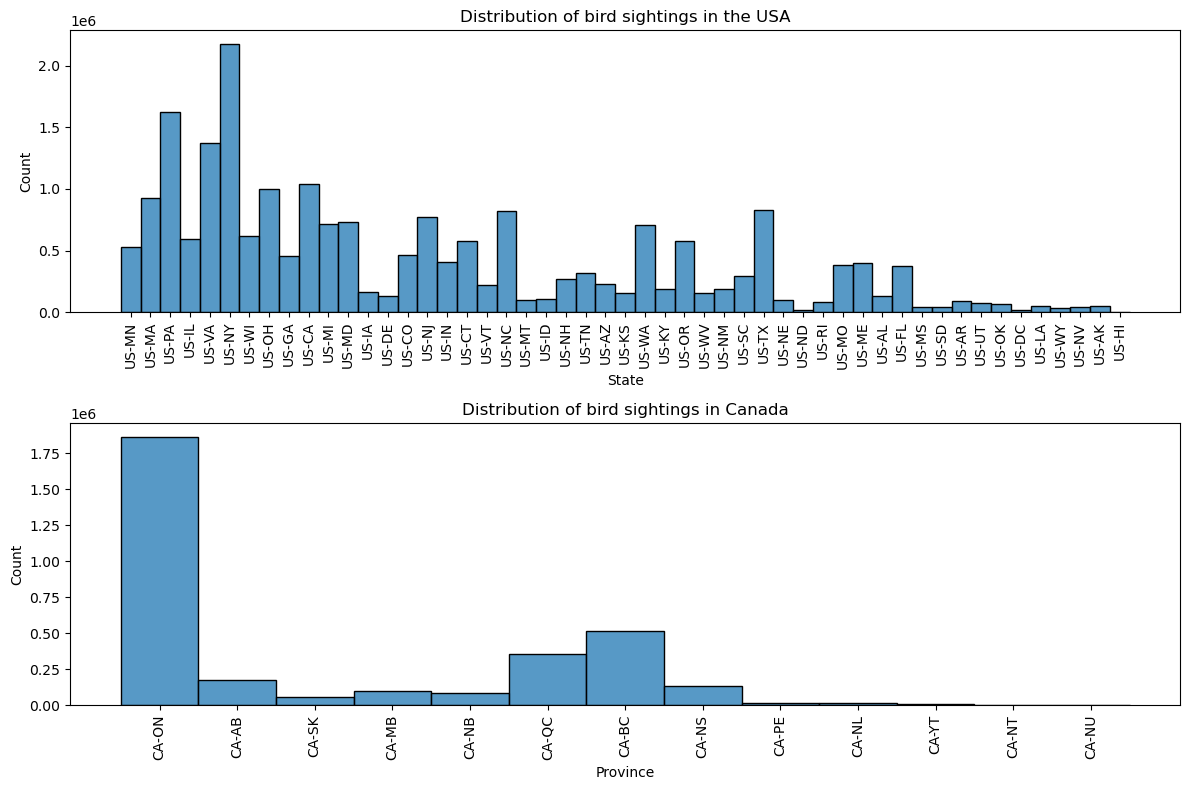

In [109]:
#Plot the two distributions in one diagram

plt.figure

plt.subplots(2,1, figsize = (12,8))

#Create the first subplot
plt.subplot(2,1,1)
plt.title("Distribution of bird sightings in the USA")
sns.histplot(df_main_US["SUBNATIONAL1_CODE"])
plt.xticks(rotation=90)
plt.xlabel("State")


#Create the second subplot
plt.subplot(2,1,2)
plt.title("Distribution of bird sightings in Canada")
sns.histplot(df_main_CA["SUBNATIONAL1_CODE"])
plt.xticks(rotation=90)
plt.xlabel("Province")

#Minimize overlap
plt.tight_layout()

plt.show()

In the USA, most of the values seem to have been recorded from the state of New York. In Canada, Ontario has by far the most value counts, followed by British Columbia.

For Canada, let's see what kind of birds were most often encountered in the different states

<Figure size 640x480 with 0 Axes>

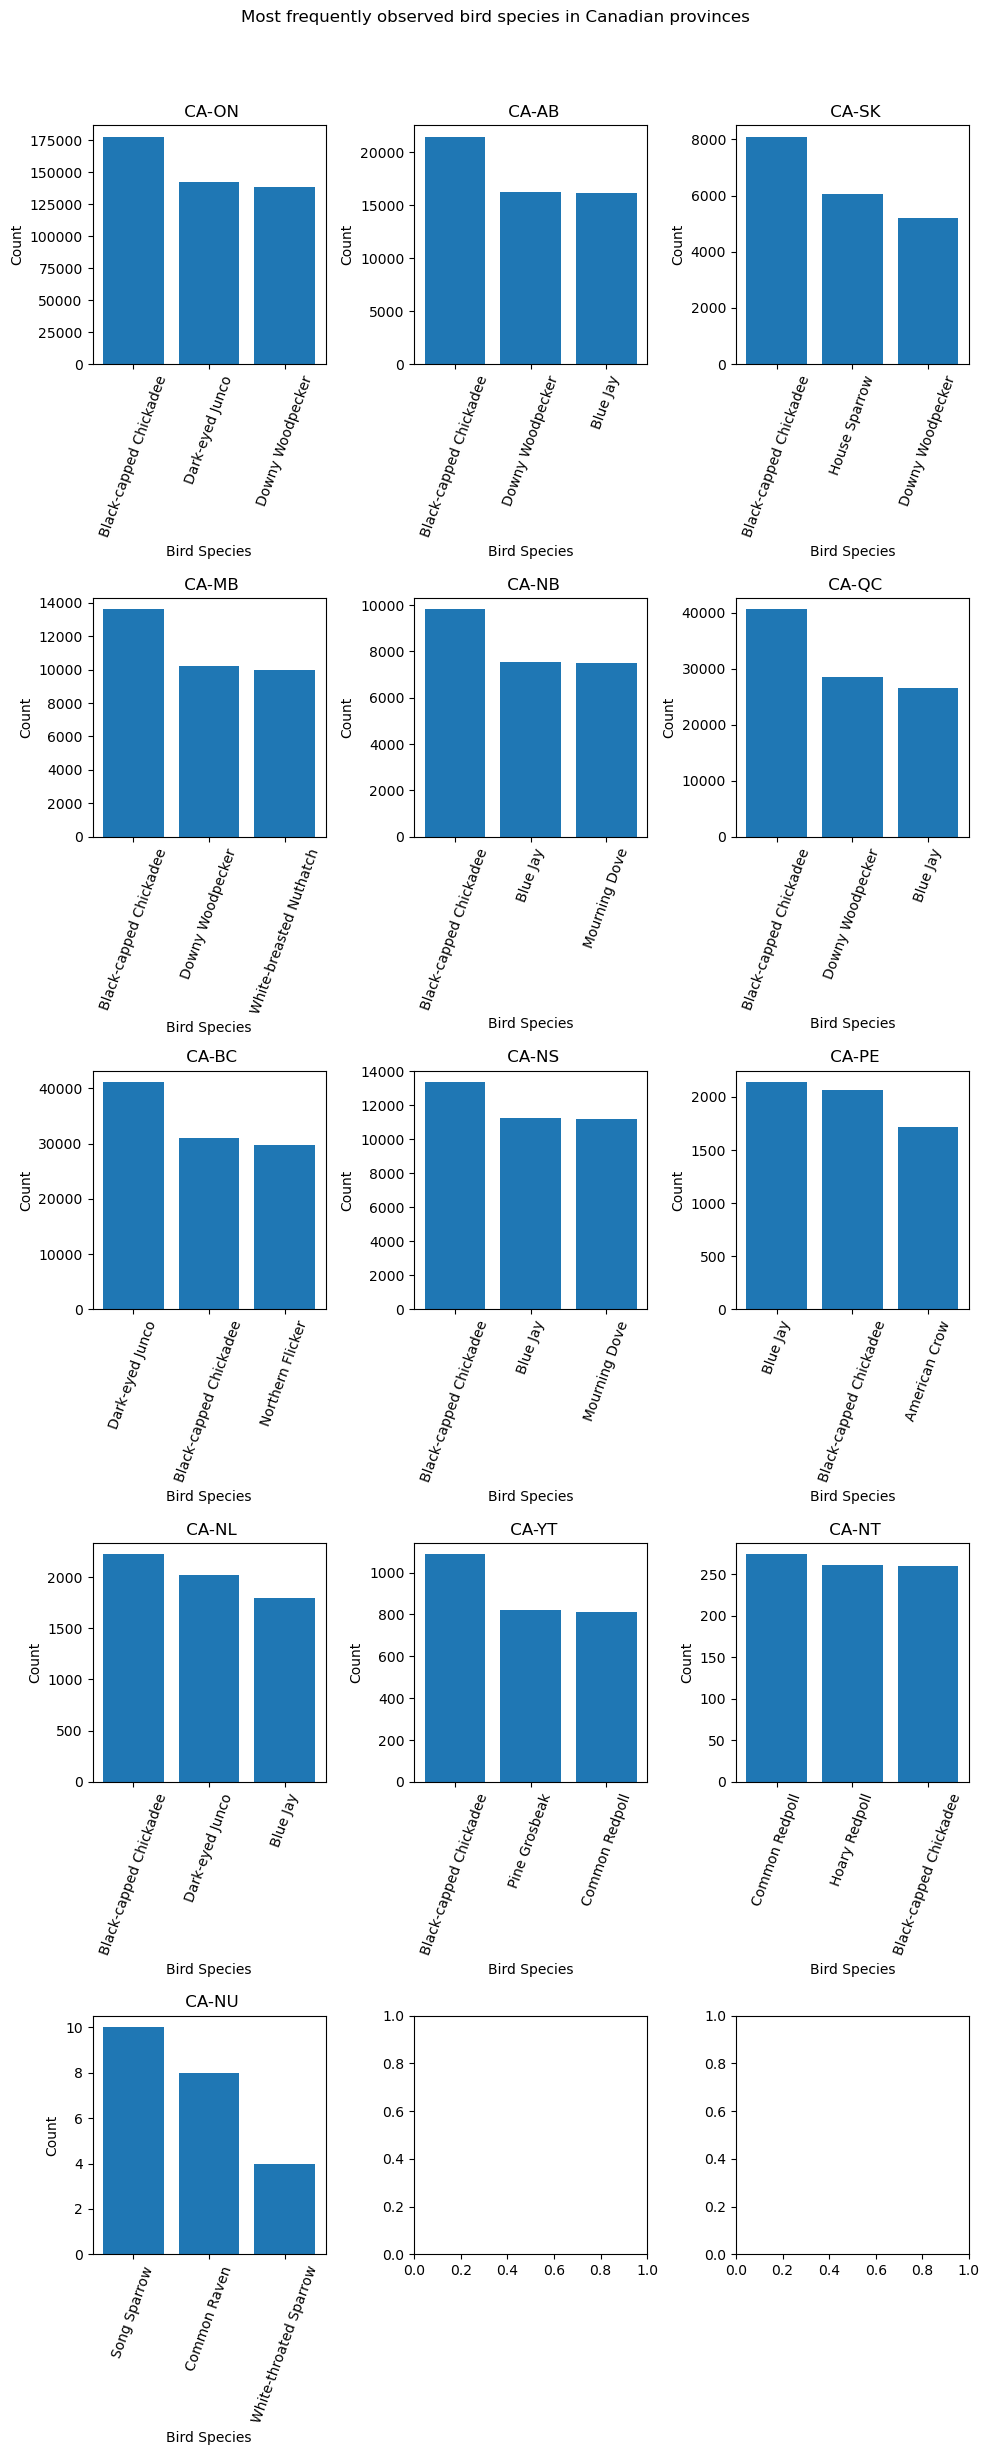

In [110]:
plt.figure()

plt.subplots(5, 3, figsize=(10, 25))


counter = 1

for province in df_main_CA["SUBNATIONAL1_CODE"].unique():
    plt.subplot(5, 3, counter)  # Use the counter variable to specify the subplot position
    df_state = df_main_CA[df_main_CA["SUBNATIONAL1_CODE"] == province]["american_english_name"].value_counts().head(3).sort_values(ascending=False)
    plt.bar(df_state.index, df_state.values)
    plt.title(f" {province}")  # Add a title to each subplot
    plt.xticks(rotation=70) 
    plt.ylabel("Count")
    plt.xlabel("Bird Species")
    counter += 1
    
plt.suptitle("Most frequently observed bird species in Canadian provinces")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the top parameter to leave space for the suptitle
plt.show()

The top row of the plots show three states that had the highest number of birds. Interestingly, even though there are differences, similar species come up in the top 3 (Black capped Chickadee, Downy Woodpecker).

Going forward, lets keep focusing on the Canadian data.

In [111]:
#Check the most often encountered birds in Canada

df_main_CA["american_english_name"].value_counts().head(3)

american_english_name
Black-capped Chickadee    321576
Downy Woodpecker          234347
Dark-eyed Junco           233864
Name: count, dtype: int64

This result is not surprising after having seen the data in each province. Lets use at the time data provided in the table.

In [112]:
#Print the value counts per year in the data

df_main_CA["Year"].value_counts()

Year
2022    410641
2021    388852
2020    313800
2023    245112
2018    241850
2016    234802
2019    233770
2017    231548
2013    201745
2014    197120
2012    194471
2015    192784
2011    185598
2010     63562
Name: count, dtype: int64

The number of observations seems to have gone up over the years. It will be easier to see this in a plot.

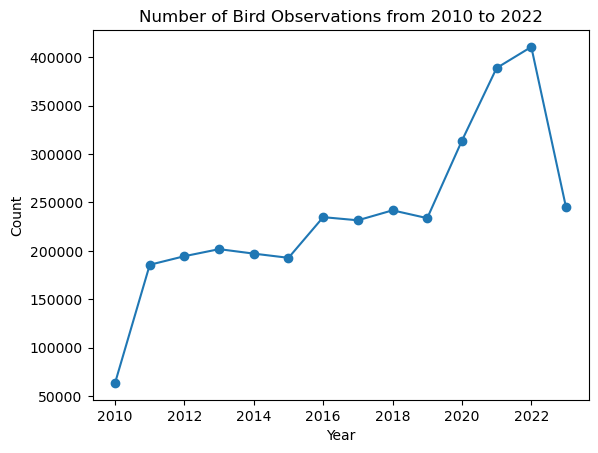

In [118]:
value_counts = df_main_CA['Year'].value_counts().sort_index()

# Create a line plot
value_counts.plot(kind='line', marker='o')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Bird Observations from 2010 to 2023')

# Show the plot
plt.show()

Both 2010 and 2023 have lower numbers of observations, but this may be due to the fact that the dataset is "cut off" during these years

In [119]:
#Print the value counts per month in the data

df_main_CA["Month"].value_counts()

Month
3     676221
1     663426
12    640326
2     591215
11    459745
4     304714
10         8
Name: count, dtype: int64

There are no bird observations during the summer months. This is because the survey is only active during the winter.

In [120]:
#Create a dataframe that groups first by year and then by month and then counts the species per month and year

df_temp = df_main_CA.groupby(['Year'])["Month"].value_counts().reset_index()
df_temp.head(10)

,Year,Month,count
0,2010,12,38322
1,2010,11,25240
2,2011,1,43073
3,2011,3,40152
4,2011,2,36035
5,2011,12,35258
6,2011,11,21499
7,2011,4,9581
8,2012,12,46677
9,2012,3,42048


Let's plot this data to see which months are most "active". We can exclude the years 2010 and 2023 because they have lower numbers of bird observations

<Figure size 640x480 with 0 Axes>

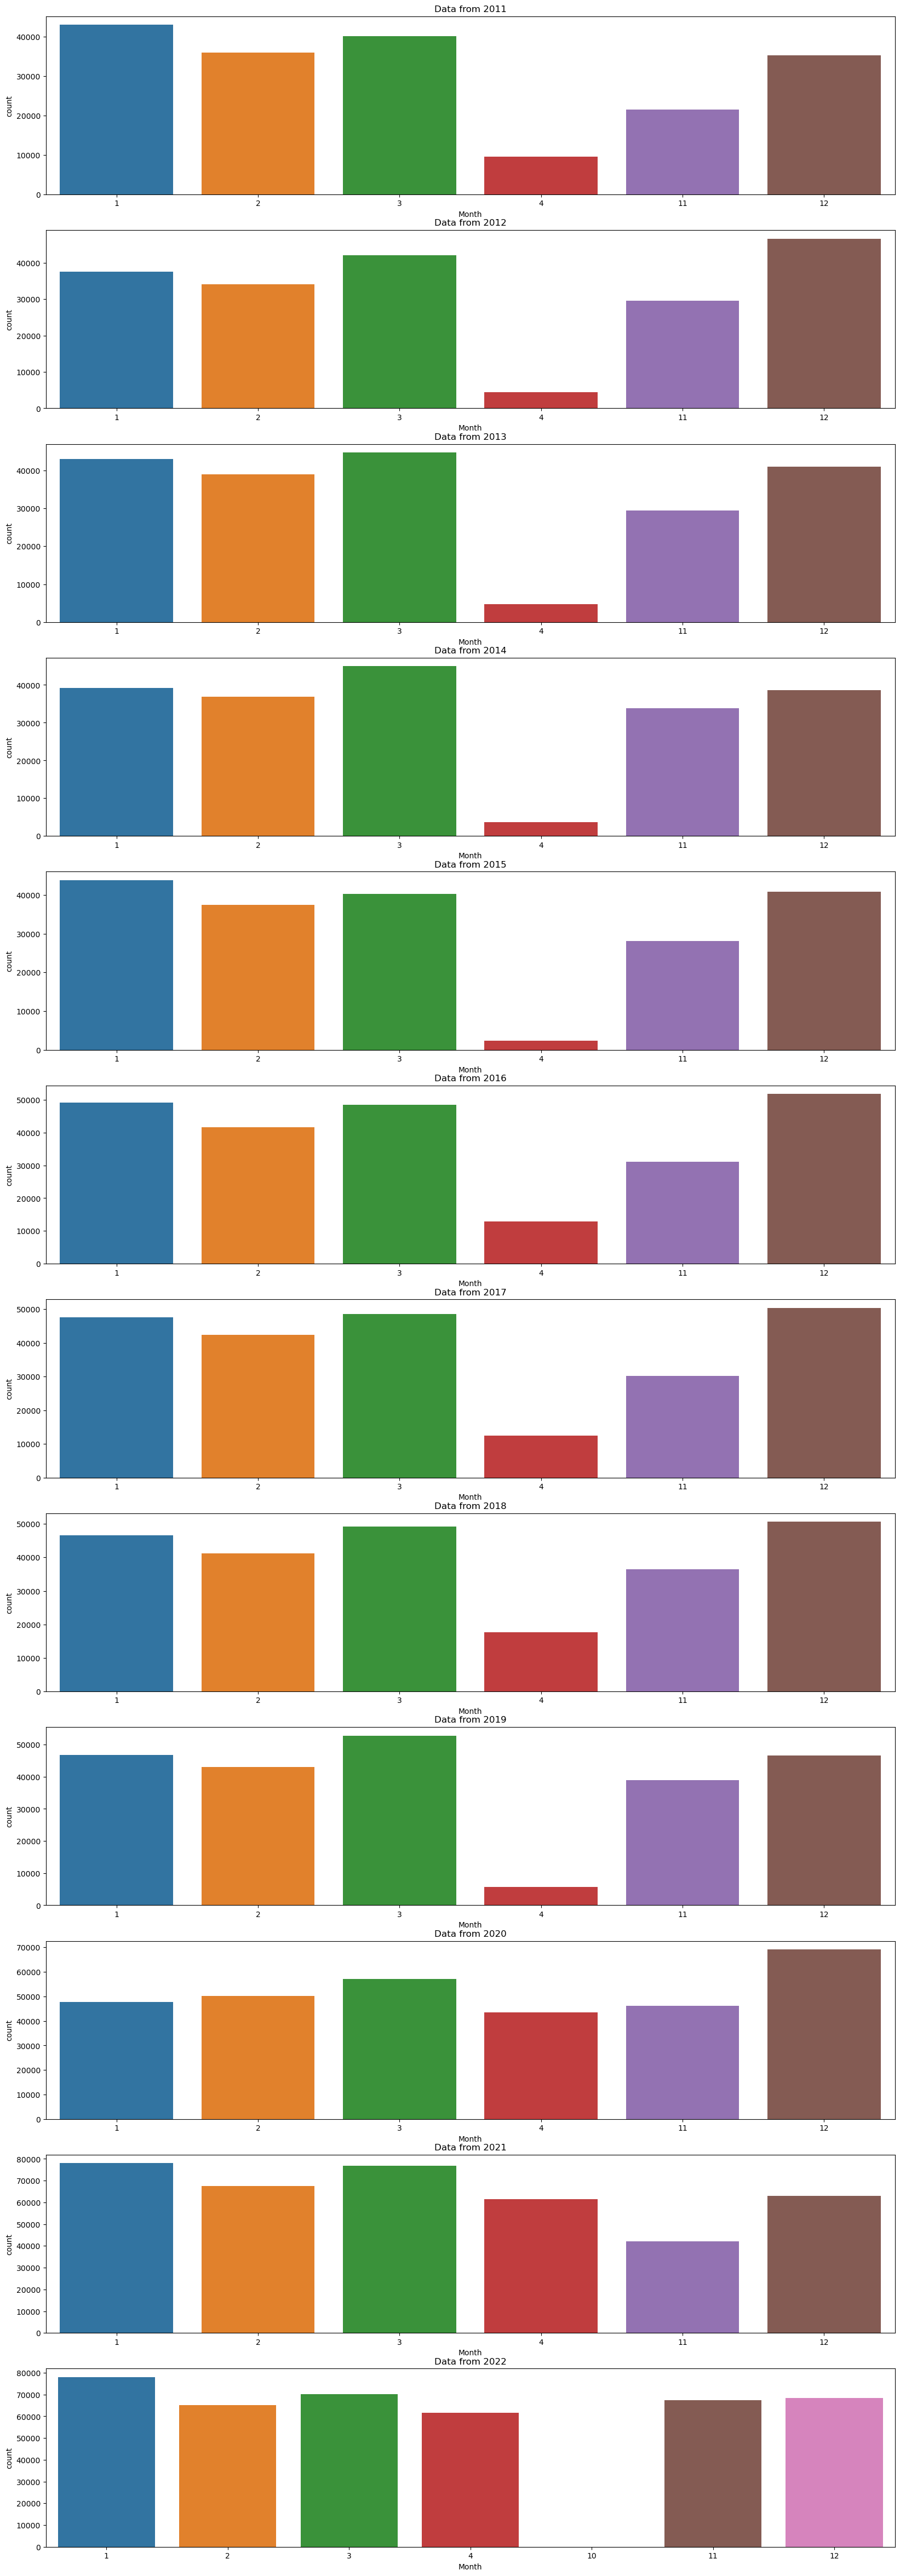

<Figure size 640x480 with 0 Axes>

In [126]:
plt.figure()

plt.subplots(12,1, figsize = (20,60))

plt.subplot(12,1,1)
plt.title("Data from 2011")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2011])

plt.subplot(12,1,2)
plt.title("Data from 2012")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2012])

plt.subplot(12,1,3)
plt.title("Data from 2013")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2013])

plt.subplot(12,1,4)
plt.title("Data from 2014")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2014])

plt.subplot(12,1,5)
plt.title("Data from 2015")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2015])

plt.subplot(12,1,6)
plt.title("Data from 2016")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2016])

plt.subplot(12,1,7)
plt.title("Data from 2017")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2017])

plt.subplot(12,1,8)
plt.title("Data from 2018")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2018])

plt.subplot(12,1,9)
plt.title("Data from 2019")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2019])

plt.subplot(12,1,10)
plt.title("Data from 2020")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2020])


plt.subplot(12,1,11)
plt.title("Data from 2021")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2021])


plt.subplot(12,1,12)
plt.title("Data from 2022")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2022])


plt.show()

plt.tight_layout()

***
***
***

### Part 3: Next steps <a class = "anchor" id = "Part-3"></a>

*Some Brainstorming ideas on how to proceed:*
- Focus on just one state, such as BC in Canada
- Explore the trends there and how they relate to the North-American trends
